In [23]:
### Mutation analysis ###
# r only - No IgM

# observedMutations function calualte the basic mutational load. 
# Mutations can be calculated as counts or frequencies and divided into replacement (R) or 
# silent (S) mutations, and subset into FWR and CDR specific mutations. 

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

# loading my tsv as a df
require(data.table)
my_data <- as.data.frame(fread("r_igg_only_filtered_contig_heavy_germ-pass.tsv"))


# Load and subset example data
db <- subset(my_data, c_call %in% c("IGHG1", "IGHG2B", "IGHG2C","IGHG3"))

In [24]:
# Calculate R and S mutation counts
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=FALSE, 
                            nproc=1)
# Show new mutation count columns
db_obs %>% 
    select(sequence_id, starts_with("mu_count_")) %>%
    head(n=10)

,sequence_id,mu_count_seq_r,mu_count_seq_s
,<chr>,<dbl>,<dbl>
1,TACTTACAGGCTAGCA-1_contig_1,3,1
2,GGGTCTGTCTGGAGCC-1_contig_1,0,0
3,ACTTTCACATAACCTG-1_contig_2,0,0
4,TCTCATAAGGATTCGG-1_contig_2,6,4
5,CCTTCGATCACGCATA-1_contig_1,0,0
6,GATCGTAAGTACGCGA-1_contig_1,6,1
7,CACATTTTCTACTATC-1_contig_1,1,0
8,ACTATCTGTGCATCTA-1_contig_1,1,0
9,ACAGCCGCAGCTGTGC-1_contig_2,0,0


In [25]:
# Calculate R and S mutation frequencies
db_obs <- observedMutations(db_obs, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=10)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,TACTTACAGGCTAGCA-1_contig_1,0.008771930,0.002923977
2,GGGTCTGTCTGGAGCC-1_contig_1,0.000000000,0.000000000
3,ACTTTCACATAACCTG-1_contig_2,0.000000000,0.000000000
4,TCTCATAAGGATTCGG-1_contig_2,0.017647059,0.011764706
5,CCTTCGATCACGCATA-1_contig_1,0.000000000,0.000000000
6,GATCGTAAGTACGCGA-1_contig_1,0.017595308,0.002932551
7,CACATTTTCTACTATC-1_contig_1,0.002915452,0.000000000
8,ACTATCTGTGCATCTA-1_contig_1,0.002915452,0.000000000
9,ACAGCCGCAGCTGTGC-1_contig_2,0.000000000,0.000000000


In [26]:
# Calculate combined R and S mutation frequencies
db_obs <- observedMutations(db, sequenceColumn="sequence_alignment",
                            germlineColumn="germline_alignment_d_mask",
                            regionDefinition=NULL,
                            frequency=TRUE, 
                            combine=TRUE,
                            nproc=1)
# Show new mutation frequency columns
db_obs %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id
,<chr>
1,TACTTACAGGCTAGCA-1_contig_1
2,GGGTCTGTCTGGAGCC-1_contig_1
3,ACTTTCACATAACCTG-1_contig_2
4,TCTCATAAGGATTCGG-1_contig_2


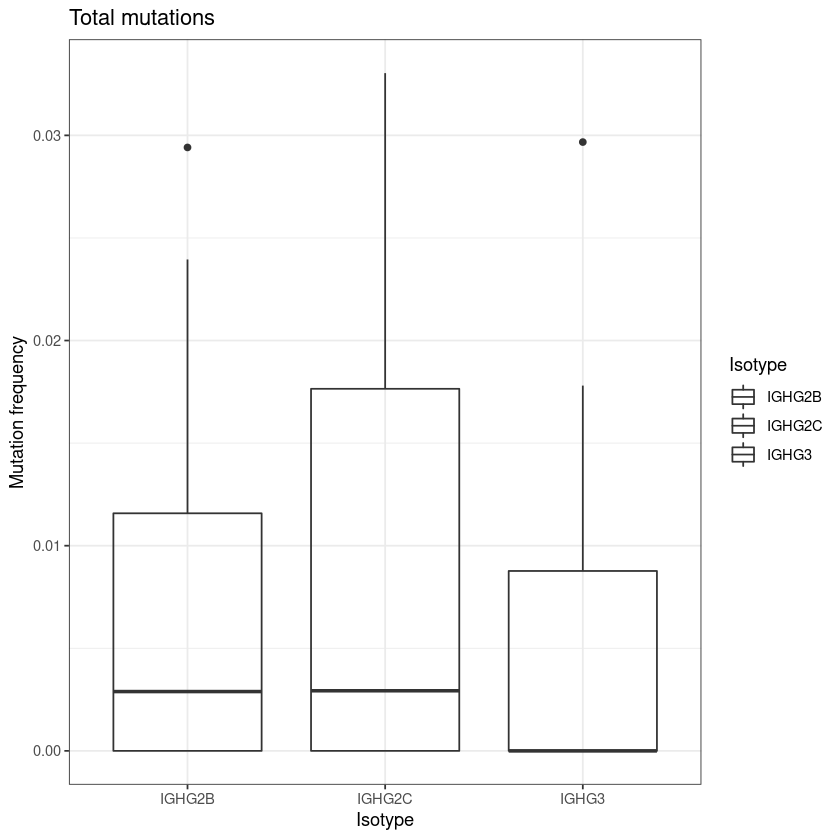

In [27]:
g1 <- ggplot(db_obs, aes(x=c_call, y=mu_freq, fill=c_call)) +
    theme_bw() + ggtitle("Total mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g1)

In [28]:
# Calculate R and S mutation counts for individual CDRs and FWRs
db_obs_v <- observedMutations(db, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V_BY_REGIONS,
                              frequency=FALSE, 
                              nproc=1)
# Show new FWR mutation columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_count_fwr")) %>%
    head(n=4)

,sequence_id,mu_count_fwr1_r,mu_count_fwr1_s,mu_count_fwr2_r,mu_count_fwr2_s,mu_count_fwr3_r,mu_count_fwr3_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TACTTACAGGCTAGCA-1_contig_1,0,1,1,0,1,0
2,GGGTCTGTCTGGAGCC-1_contig_1,0,0,0,0,0,0
3,ACTTTCACATAACCTG-1_contig_2,0,0,0,0,0,0
4,TCTCATAAGGATTCGG-1_contig_2,0,0,0,0,4,4


In [29]:
# Calculate aggregate CDR and FWR V-segment R and S mutation frequencies
db_obs_v <- observedMutations(db_obs_v, sequenceColumn="sequence_alignment",
                              germlineColumn="germline_alignment_d_mask",
                              regionDefinition=IMGT_V,
                              frequency=TRUE, 
                              nproc=1)
# Show new CDR and FWR mutation frequency columns
db_obs_v %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_cdr_r,mu_freq_cdr_s,mu_freq_fwr_r,mu_freq_fwr_s
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,TACTTACAGGCTAGCA-1_contig_1,0.02083333,0,0.008333333,0.004166667
2,GGGTCTGTCTGGAGCC-1_contig_1,0.00000000,0,0.000000000,0.000000000
3,ACTTTCACATAACCTG-1_contig_2,0.00000000,0,0.000000000,0.000000000
4,TCTCATAAGGATTCGG-1_contig_2,0.04166667,0,0.016666667,0.016666667


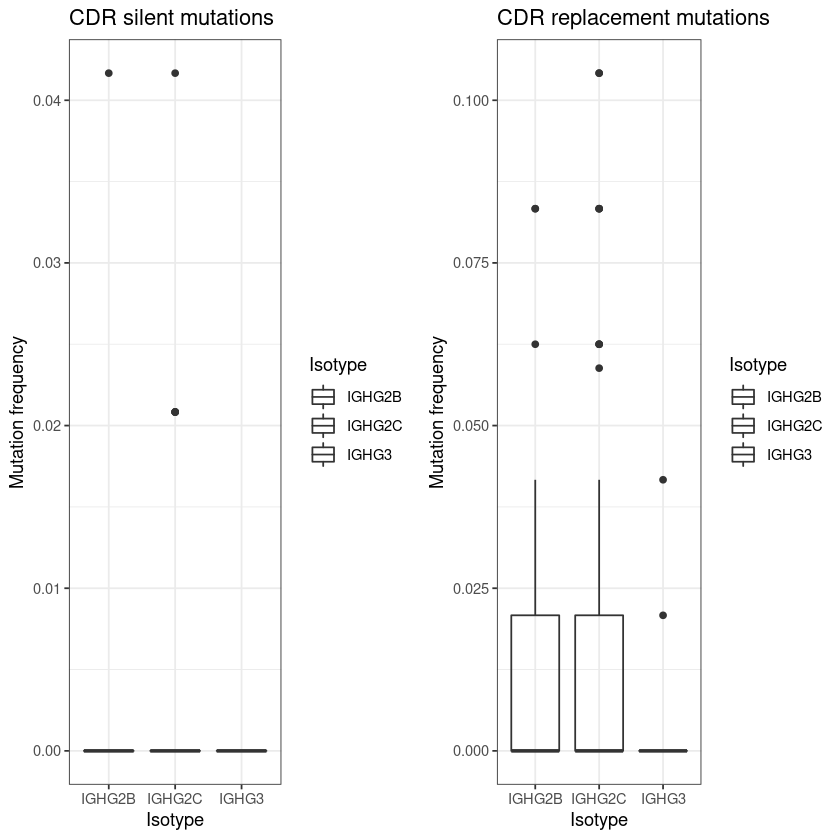

In [30]:
g2 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_s, fill=c_call)) +
    theme_bw() + ggtitle("CDR silent mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
g3 <- ggplot(db_obs_v, aes(x=c_call, y=mu_freq_cdr_r, fill=c_call)) +
    theme_bw() + ggtitle("CDR replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
alakazam::gridPlot(g2, g3, ncol=2)

In [31]:
# Calculate charge mutation frequency for the full sequence
db_obs_ch <- observedMutations(db, sequenceColumn="sequence_alignment",
                               germlineColumn="germline_alignment_d_mask",
                               regionDefinition=NULL,
                               mutationDefinition=CHARGE_MUTATIONS,
                               frequency=TRUE, 
                               nproc=1)
# Show new charge mutation frequency columns
db_obs_ch %>% 
    select(sequence_id, starts_with("mu_freq_")) %>%
    head(n=4)

,sequence_id,mu_freq_seq_r,mu_freq_seq_s
,<chr>,<dbl>,<dbl>
1,TACTTACAGGCTAGCA-1_contig_1,0.005847953,0.005847953
2,GGGTCTGTCTGGAGCC-1_contig_1,0.000000000,0.000000000
3,ACTTTCACATAACCTG-1_contig_2,0.000000000,0.000000000
4,TCTCATAAGGATTCGG-1_contig_2,0.002941176,0.026470588


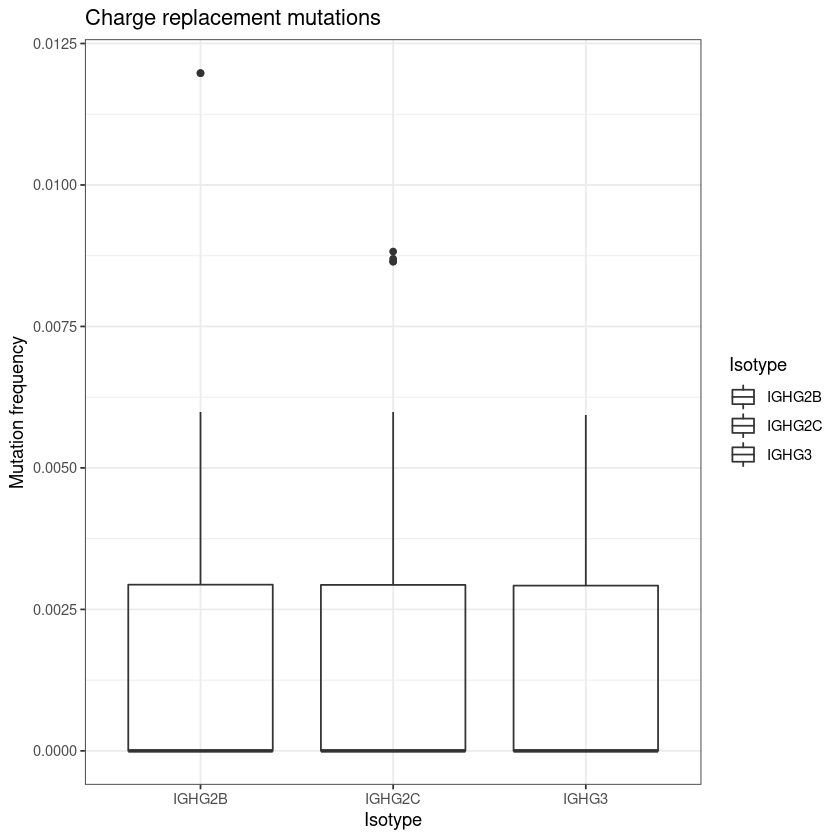

In [32]:
g4 <- ggplot(db_obs_ch, aes(x=c_call, y=mu_freq_seq_r, fill=c_call)) +
    theme_bw() + ggtitle("Charge replacement mutations") +
    xlab("Isotype") + ylab("Mutation frequency") +
    scale_fill_manual(name="Isotype", values=IG_COLORS) +
    geom_boxplot()
plot(g4)